<h1><center>Chapter04. 통계분석</center></h1>

<h1><center>제 6절. 주성분 분석</center></h1>

## [PCA Principal Component Analysis 주성분분석]

상관관계가 있는 변수들을 결합해 상관관계가 없는 변수로 분산을 극대화하는 변수이다.
- 선형 결합을 통해 변수를 축약하는데 사용
- 데이터의 내부 구조를 파악하여 예측모델을 만드는데 사용
- 희생되는 정보가 가장 적은 방향을 결정
- 보통 3개 이내로 축약, 정보손실은 20% 이내로 설정

----

## 1. 요인분석과 비교

요인 분석은 몇 개의 잠재된 변수를 추출하기 위해 사용하는 분석 방법이다. 
- 여러가지 방법이 있는데 주성분 분석은 그 중 한가지 방법

- **공통점** : 많은 변수들을 몇 개의 변수로 축소하는데 활용한다.


- **차이점**
    1. **변수의 수와 이름** : 요인분석은 이름을 붙일 수 있고 몇 개든 지정가능, 주성분 분석은 보통 2개 정도
    1. **변수와의 관계** : 요인분석은 기본적으로 대등한 관계, 주성분은 제 1주성분이 중요, 제 2주성분은 그 다음으로 중요
    1. **목표변수와의 관계** : 요인분석은 목표변수를 고려하지 않음, 주성분은 목표변수에 따라 주성분 변수를 생성

----

## 2. [Heprathlon 7종 경기] 데이터셋 분석

올림픽 여자 7종 경기 데이더셋. 
- 패키지가 없을 경우 : `install.packages("HSAUR")`
- 참고 : https://blog.naver.com/projaewon2/220775652966

### 2_1. Load Dataset

종목에 따라 큰 숫자가 좋은 것도 있고 나쁜 것도 있다. 이를 한 방향으로 맞추기 위해 시간 기록을 가장 늦은 선수의 기록에서 빼는 것으로 하여 수치가 클 수록 좋은 것으로 방향을 맞춘다.

In [12]:
library(HSAUR)
data(heptathlon)
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411


In [22]:
# 데이터 확인
str(heptathlon)  # 전부 수치형 데이터

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [20]:
# 데이터 전처리 작업. 데이터의 방향성을 맞춤.
heptathlon_pre = heptathlon_org
heptathlon_pre$hurdles <- max(heptathlon_pre$hurdles) - heptathlon_pre$hurdles
heptathlon_pre$run200m <- max(heptathlon_pre$run200m) - heptathlon_pre$run200m
heptathlon_pre$run800m <- max(heptathlon_pre$run800m) - heptathlon_pre$run800m

In [21]:
# hurdle, run200m, run800m의 값 변경 확인.
head(heptathlon_pre)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540
Schulz (GDR),2.67,1.83,13.50,1.96,6.33,42.82,37.64,6411


### 2_2. 산점도 확인

산점도를 보면 7개 종목 중 두 종목 간에는 양의 상관 관계가 있음을 알 수 있다. [Javalin 투창]은 약간 예외인데 다른 종목과 다르게 기술이 중요하기 때문이다.

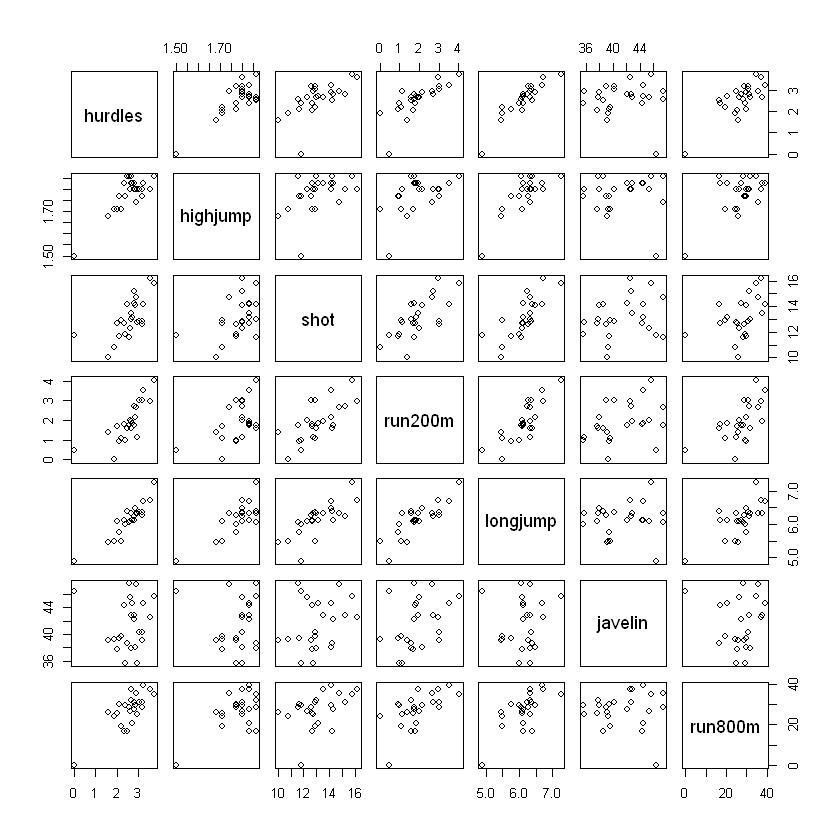

In [28]:
score <- which(colnames(heptathlon_pre)=="score")
plot(heptathlon_pre[-score])

### 2_3. 상관계수 확인

cor 함수를 이용해 두 종목간의 상관계수를 산출 종목 간 상관계수도 산점도에서와 같이 투창을 제외하고는 다른 종목간에 상관관계가 있다는 것을 확인 가능하다.

In [38]:
round(cor(heptathlon_pre[-score]), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.00,0.81,0.65,0.77,0.91,0.01,0.78
highjump,0.81,1.00,0.44,0.49,0.78,0.00,0.59
shot,0.65,0.44,1.00,0.68,0.74,0.27,0.42
run200m,0.77,0.49,0.68,1.00,0.82,0.33,0.62
longjump,0.91,0.78,0.74,0.82,1.00,0.07,0.70
javelin,0.01,0.00,0.27,0.33,0.07,1.00,-0.02
run800m,0.78,0.59,0.42,0.62,0.70,-0.02,1.00


### 2_4. 주성분 분석

primp 함수를 적용하면 각 요소에 대한 계수와 주성분 점수를 얻을 수 있다.

In [42]:
heptathlon_pca <- prcomp(heptathlon_pre[-score], scale=T)
heptathlon_pca

Standard deviations (1, .., p=7):
[1] 2.1119364 1.0928497 0.7218131 0.6761411 0.4952441 0.2701029 0.2213617

Rotation (n x k) = (7 x 7):
                PC1         PC2         PC3         PC4         PC5         PC6
hurdles  -0.4528710  0.15792058 -0.04514996  0.02653873 -0.09494792 -0.78334101
highjump -0.3771992  0.24807386 -0.36777902  0.67999172  0.01879888  0.09939981
shot     -0.3630725 -0.28940743  0.67618919  0.12431725  0.51165201 -0.05085983
run200m  -0.4078950 -0.26038545  0.08359211 -0.36106580 -0.64983404  0.02495639
longjump -0.4562318  0.05587394  0.13931653  0.11129249 -0.18429810  0.59020972
javelin  -0.0754090 -0.84169212 -0.47156016  0.12079924  0.13510669 -0.02724076
run800m  -0.3749594  0.22448984 -0.39585671 -0.60341130  0.50432116  0.15555520
                 PC7
hurdles   0.38024707
highjump -0.43393114
shot     -0.21762491
run200m  -0.45338483
longjump  0.61206388
javelin   0.17294667
run800m  -0.09830963

summary 함수를 이용해 추가적인 정보를 얻을 수 있다. longjump와 run200m가 중요하고, javelin이 가장 덜 중요함을 알 수 있다.

In [45]:
summary(heptathlon_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.1119 1.0928 0.72181 0.67614 0.49524 0.27010 0.2214
Proportion of Variance 0.6372 0.1706 0.07443 0.06531 0.03504 0.01042 0.0070
Cumulative Proportion  0.6372 0.8078 0.88223 0.94754 0.98258 0.99300 1.0000

- 제1주성분과 제2주성분의 누적 기여율은 80%
- 제1주성분의 기여율(해석률)은 63%, 제2주성분을 통한 기여율은 17% 정도

In [58]:
a1 <- heptathlon_pca$rotation[,1]
mode(a1)
sort(a1)

[1] "numeric"

longjump    hurdles    run200m   highjump    run800m       shot    javelin 
-0.4562318 -0.4528710 -0.4078950 -0.3771992 -0.3749594 -0.3630725 -0.0754090

In [57]:
a2 <- heptathlon_pca$rotation[,2]
mode(a2)
sort(a2)

[1] "numeric"

javelin        shot     run200m    longjump     hurdles     run800m 
-0.84169212 -0.28940743 -0.26038545  0.05587394  0.15792058  0.22448984 
   highjump 
 0.24807386

summary의 **Cumulative Proportion**을 보면 처음 2개의 성분이 81%를 설명하는 것을 알 수 있다. batplot을 통해서 보면 두 성분이 얼마나 중요한지 알 수 있다.

[1] -0.9910978

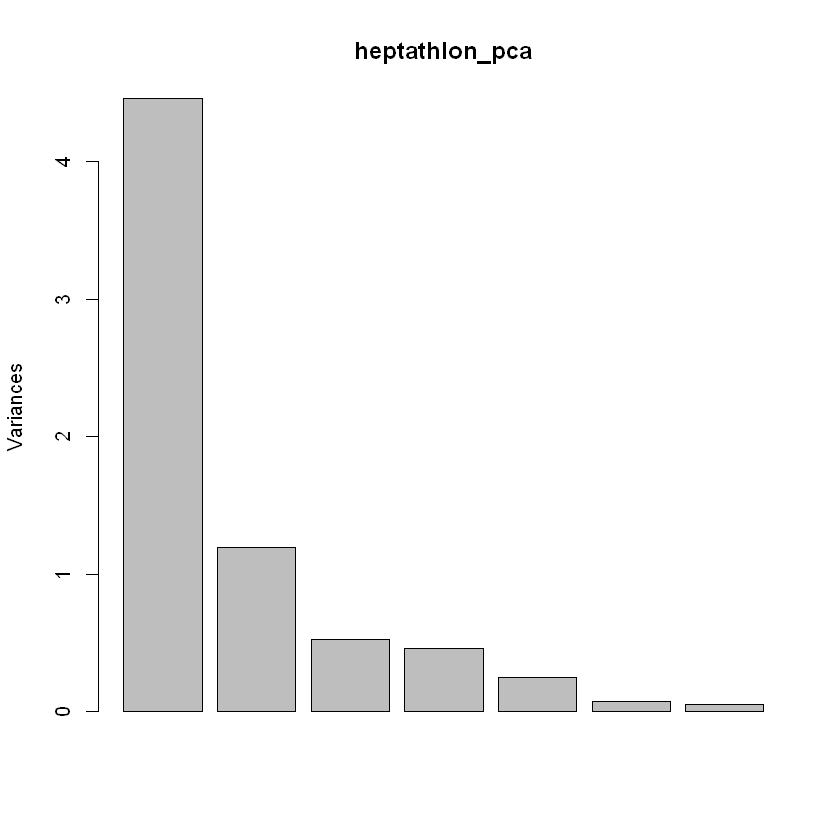

In [64]:
cor(heptathlon_pre$score, heptathlon_pca$x[,1] )
plot(heptathlon_pca)

- PC7까지 있지만 1,2가 대부분을 설명함을 알 수 있다.

rescale을 위해 centor와 scale값을 추출한다. 
- rescale은 규모를 축소해서 다시 설계한다는 의미

In [68]:
center <- heptathlon_pca$center
scale <- heptathlon_pca$scale

첫번째 주성분을 추출한다. scale 함수를 적용하고, 각 선수별 주성분 점수를 계산한다.
- hm을 score를 제외한 matrix로 저장. hm을 center와 scale을 추출한 값으로 축소하고 PC1값과 행렬 곱셈
- **drop** : 1개 수준을 가진 집합체의 차원을 삭제
- **%*%** : 행렬곱셈 명령어

In [75]:
hm <- as.matrix(heptathlon_pre[, -score])
drop(scale(hm, center=center, scale=scale) %*% heptathlon_pca$rotation[,1] )

Joyner-Kersee (USA)          John (GDR)        Behmer (GDR)  Sablovskaite (URS) 
       -4.121447626        -2.882185935        -2.649633766        -1.343351210 
  Choubenkova (URS)        Schulz (GDR)       Fleming (AUS)       Greiner (USA) 
       -1.359025696        -1.043847471        -1.100385639        -0.923173639 
   Lajbnerova (CZE)       Bouraga (URS)       Wijnsma (HOL)     Dimitrova (BUL) 
       -0.530250689        -0.759819024        -0.556268302        -1.186453832 
     Scheider (SWI)         Braun (FRG)  Ruotsalainen (FIN)        Yuping (CHN) 
        0.015461226         0.003774223         0.090747709        -0.137225440 
        Hagger (GB)         Brown (USA)       Mulliner (GB)    Hautenauve (BEL) 
        0.171128651         0.519252646         1.125481833         1.085697646 
       Kytola (FIN)      Geremias (BRA)       Hui-Ing (TAI)      Jeong-Mi (KOR) 
        1.447055499         2.014029620         2.880298635         2.970118607 
        Launa (PNG) 
        6.270021972

이렇게 선수별 주성분 점수가 계산됨. 또는 주성분 요소로부터 직접 값을 얻을 수 있다.

In [77]:
predict(heptathlon_pca)[,1]

Joyner-Kersee (USA)          John (GDR)        Behmer (GDR)  Sablovskaite (URS) 
       -4.121447626        -2.882185935        -2.649633766        -1.343351210 
  Choubenkova (URS)        Schulz (GDR)       Fleming (AUS)       Greiner (USA) 
       -1.359025696        -1.043847471        -1.100385639        -0.923173639 
   Lajbnerova (CZE)       Bouraga (URS)       Wijnsma (HOL)     Dimitrova (BUL) 
       -0.530250689        -0.759819024        -0.556268302        -1.186453832 
     Scheider (SWI)         Braun (FRG)  Ruotsalainen (FIN)        Yuping (CHN) 
        0.015461226         0.003774223         0.090747709        -0.137225440 
        Hagger (GB)         Brown (USA)       Mulliner (GB)    Hautenauve (BEL) 
        0.171128651         0.519252646         1.125481833         1.085697646 
       Kytola (FIN)      Geremias (BRA)       Hui-Ing (TAI)      Jeong-Mi (KOR) 
        1.447055499         2.014029620         2.880298635         2.970118607 
        Launa (PNG) 
        6.270021972

### 2_5. 2개의 주성분을 이용한 시각화

선수들의 2개의 주성분에 의한 시각화는 좌측과 아래의 척도로, 종목별 주성분에 대한 시각화는 우측과 상단의 척도로 시각화 한다.



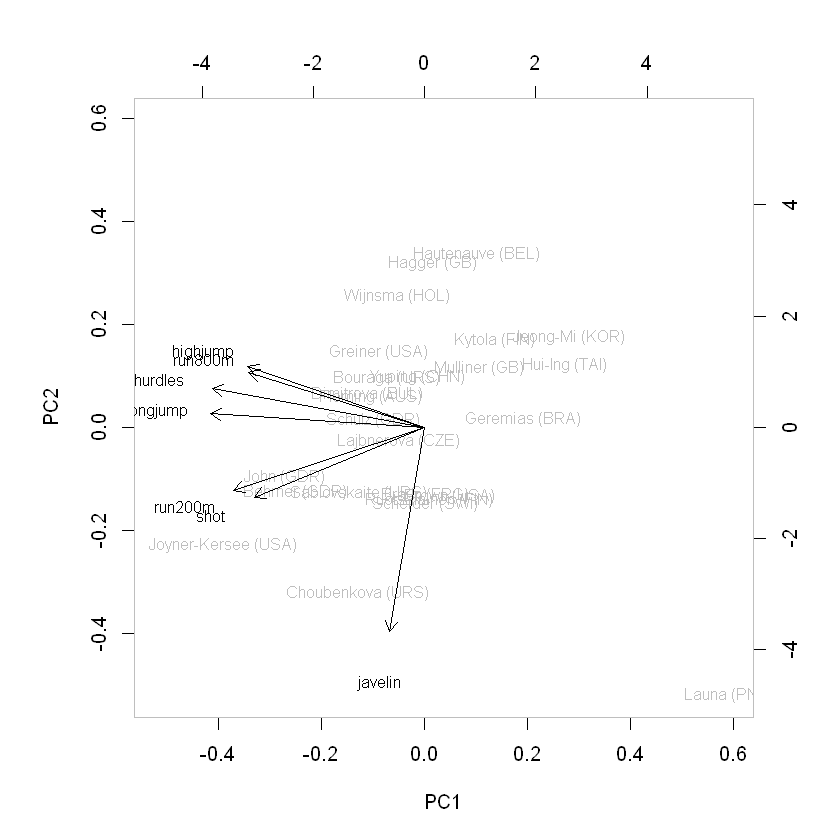

In [82]:
biplot(heptathlon_pca, col=c("gray", "black"), cex=0.8)

### 2_6. 첫번째 주성분과 7종 경기 점수와의 상관관계

7종 경기에서 쓰이는 표준점수와 첫 번째 주성분 점수와의 상관관계를 확인.


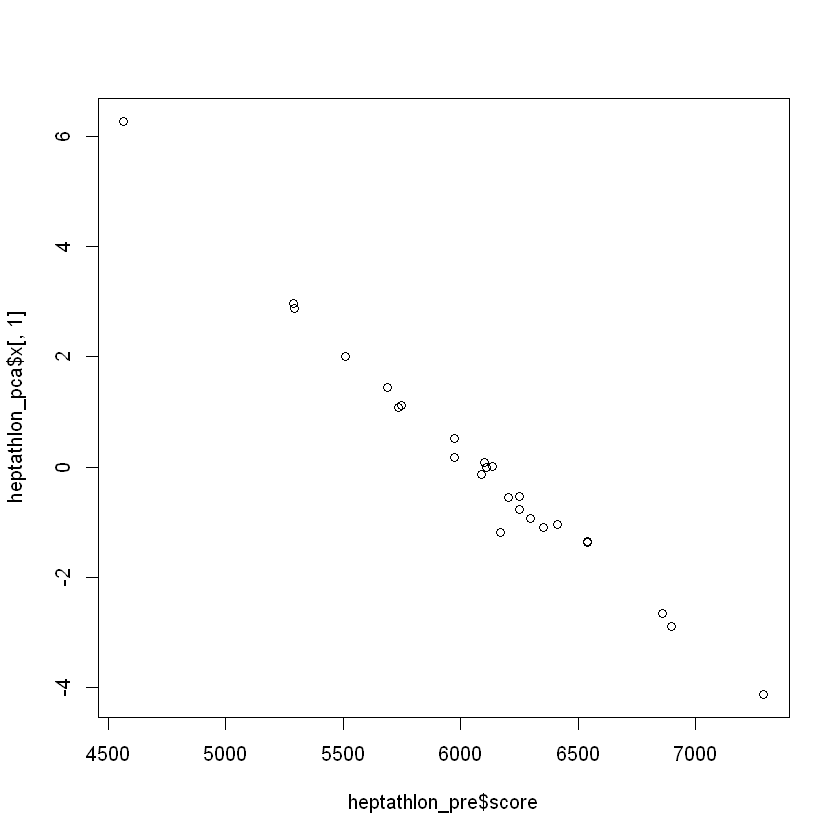

In [83]:
plot(heptathlon_pre$score, heptathlon_pca$x[,1])

In [85]:
cor(heptathlon_pre$score, heptathlon_pca$x[,1])

[1] -0.9910978

### 2_7. 결론

첫 번째 주성분이 올림픽 7종 경기의 공식 점수와 한 방향임을 알 수 있다.

----